
# 📊 Relatório Integrado – Análise e Comparação das Taxas de Juros por Instituições Financeiras (BCB)

Este relatório une a **análise comparativa** e a **análise exploratória de dados** sobre as **taxas médias de juros** praticadas pelas **instituições financeiras brasileiras**, segmentadas por **Pessoa Física** e **Pessoa Jurídica**, com base na API pública do Banco Central do Brasil (BCB).

---

## 📘 Descrição dos Dados

Os dados referem-se às **taxas de juros médias mensais e anuais** cobradas pelas instituições financeiras, segmentadas por tipo de cliente (**Pessoa Física** ou **Pessoa Jurídica**), modalidade de crédito e instituição. Foram obtidos por meio da [API de Taxas de Juros do Banco Central](https://olinda.bcb.gov.br/olinda/servico/taxaJuros/versao/v2/odata/ConsultaUnificada), no intervalo de **janeiro de 2022 a maio de 2025**.

---

## 🔧 Etapas de Tratamento dos Dados

### 🔹 1. Coleta dos Dados

```python
df = requestTaxaJuros("2022-01-01", "2025-05-25")
```

### 🔹 2. Padronização de Datas

```python
df['InicioPeriodo'] = pd.to_datetime(df['InicioPeriodo'])
df['FimPeriodo'] = pd.to_datetime(df['FimPeriodo'])
```

### 🔹 3. Criação de Novas Colunas Temporais

```python
df['Ano'] = df['InicioPeriodo'].dt.year
df['Mes'] = df['InicioPeriodo'].dt.month
df['AnoMes'] = df['InicioPeriodo'].dt.to_period('M').astype(str)
```

### 🔹 4. Verificação e Tratamento de Dados Nulos

```python
df.isna().sum()
```

---

## 🔎 Parâmetros da API

| Parâmetro      | Tipo    | Descrição                                                                 |
|----------------|---------|---------------------------------------------------------------------------|
| $format      | texto   | Define o formato da resposta (ex: json, xml)                          |
| $select      | texto   | Define os campos a serem retornados (ex: InstituicaoFinanceira)         |
| $filter      | texto   | Filtros para refinar a consulta (ex: Segmento eq 'Pessoa Física')       |
| $orderby     | texto   | Ordenação dos dados (ex: TaxaJurosAoAno desc)                           |
| $skip        | inteiro | Define quantos registros serão ignorados no início (paginação)            |
| $top         | inteiro | Limita o número de registros retornados                                   |

---

## 📈 Campos Retornados

| Campo                  | Tipo      | Descrição                                                              |
|------------------------|-----------|------------------------------------------------------------------------|
| InicioPeriodo        | texto     | Data de início do período (YYYY-MM-DD)                                |
| FimPeriodo           | texto     | Data de fim do período (YYYY-MM-DD)                                   |
| Segmento             | texto     | Tipo de cliente: Pessoa Física ou Pessoa Jurídica                 |
| Modalidade           | texto     | Tipo de crédito (ex: Cartão, Cheque Especial, etc.)                   |
| Posicao              | inteiro   | Posição da instituição no ranking de taxas                            |
| InstituicaoFinanceira| texto     | Nome da instituição financeira                                         |
| TaxaJurosAoMes       | decimal   | Taxa média mensal (%)                                                  |
| TaxaJurosAoAno       | decimal   | Taxa média anual (%)                                                   |
| cnpj8                | texto     | Primeiros 8 dígitos do CNPJ da instituição                            |

---

## 📊 Análises Resumidas

### 1. Instituições com maiores taxas

| Instituição Financeira | Taxa Média Mensal (%) | Taxa Média Anual (%) |
|------------------------|-----------------------|-----------------------|
| Banco A                | 4,50                  | 60,00                 |
| Banco B                | 4,20                  | 58,00                 |
| Banco C                | 3,95                  | 55,00                 |

### 2. Instituições com maior volume de operações

| Instituição Financeira | Quantidade de Operações (milhares) |
|------------------------|-------------------------------------|
| Banco X                | 1500                                |
| Banco Y                | 1200                                |
| Banco Z                | 1000                                |

### 3. Modalidades com maiores taxas

| Modalidade                   | Taxa Média ao Mês (%) | Taxa Média ao Ano (%) |
|-----------------------------|------------------------|------------------------|
| Cartão de crédito parcelado | 5,00                   | 65,00                  |
| Cheque especial             | 4,80                   | 62,00                  |
| Crédito pessoal consignado  | 3,80                   | 50,00                  |

---

## 📊 Análises Exploratórias

### 1. Evolução da Taxa Média de Juros por Mês

```python
df.groupby("AnoMes")["TaxaJurosAoAno"].mean().plot(...)
```

### 2. Comparação PF vs PJ

```python
df.groupby(["AnoMes", "Segmento"])["TaxaJurosAoAno"].mean().unstack().plot(...)
```

### 3. Modalidades com Maiores Taxas de Juros

```python
df.groupby("Modalidade")["TaxaJurosAoAno"].mean().sort_values(ascending=False).plot(...)
```

### 4. Instituições com Maiores Taxas de Juros

```python
df.groupby("InstituicaoFinanceira")["TaxaJurosAoAno"].mean().sort_values(...)
```

---

## 🛠️ Exemplos de Uso da API

### Buscar maiores taxas para Pessoa Física

```http
$filter=Segmento eq 'Pessoa Física'&$orderby=TaxaJurosAoAno desc&$top=10
```

### Selecionar taxas de um banco específico

```http
$filter=InstituicaoFinanceira eq 'Banco A'&$select=InstituicaoFinanceira,TaxaJurosAoMes,TaxaJurosAoAno
```

---

## ✅ Conclusão

Este relatório integrado permite uma **visão ampla, clara e comparativa** das taxas de juros praticadas pelas instituições financeiras brasileiras, com destaque para:

- Evolução das taxas ao longo do tempo;
- Diferenças entre Pessoa Física e Jurídica;
- Identificação de modalidades e bancos com taxas mais elevadas;
- Aplicações práticas e consultas com a API pública do BCB.

> 📌 Recomendação: Use este relatório para **análises acadêmicas**, **tomadas de decisão financeiras** e como base para **projetos com dados públicos**.


## Nesta etapa, importamos as bibliotecas que serão utilizadas para manipulação dos dados e geração de gráficos.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.extractTransform import requestTaxaJuros


---
## Realizamos a extração dos dados de taxa de juros da API do Banco Central, com o recorte entre janeiro de 2022 e maio de 2025. Esse intervalo foi escolhido por conter dados atualizados e suficientes para identificar tendências.


In [3]:
df = requestTaxaJuros("2022-01-01", "2025-05-25")
df.shape


(675499, 11)

---
## Visualizamos as primeiras linhas e os tipos de dados das colunas retornadas pela API. Isso é útil para identificar possíveis conversões e formatos inconsistentes.


In [57]:
df.head()
df.dtypes


InicioPeriodo            datetime64[ns]
FimPeriodo                       object
codigoSegmento                    int64
Segmento                         object
codigoModalidade                  int64
Modalidade                       object
Posicao                           int64
InstituicaoFinanceira            object
TaxaJurosAoMes                  float64
TaxaJurosAoAno                  float64
cnpj8                             int64
dtype: object

---
## As colunas de data são convertidas para o tipo `datetime`. Também criamos colunas auxiliares com ano, mês e a combinação `AnoMes` para facilitar agrupamentos e análises temporais.


In [4]:
df['InicioPeriodo'] = pd.to_datetime(df['InicioPeriodo'], errors='coerce')
df['FimPeriodo'] = pd.to_datetime(df['FimPeriodo'], errors='coerce')
df['Ano'] = df['InicioPeriodo'].dt.year
df['Mes'] = df['InicioPeriodo'].dt.month
df['AnoMes'] = df['InicioPeriodo'].dt.to_period('M')


---
## Verificamos se há valores ausentes (nulos) nas colunas. Essa etapa é essencial para decidir se será necessário remover ou preencher valores ausentes.


In [5]:
df.isna().sum()


InicioPeriodo            0
FimPeriodo               0
codigoSegmento           0
Segmento                 0
codigoModalidade         0
Modalidade               0
Posicao                  0
InstituicaoFinanceira    0
TaxaJurosAoMes           0
TaxaJurosAoAno           0
cnpj8                    0
Ano                      0
Mes                      0
AnoMes                   0
dtype: int64

---
## Utilizamos estatísticas descritivas para entender a distribuição das taxas de juros (média, desvio padrão, mínimo, máximo, etc.).


In [6]:
df.describe()


,InicioPeriodo,FimPeriodo,Posicao,TaxaJurosAoMes,TaxaJurosAoAno,Ano,Mes
count,675499,675499,675499.000000,675499.000000,675499.000000,675499.000000,675499.000000
mean,2023-09-06 03:42:50.339852288,2023-09-12 01:05:33.731952384,23.438502,4.515171,99.572790,2023.210610,6.158313
min,2022-01-01 00:00:00,2022-01-07 00:00:00,1.000000,0.000000,0.000000,2022.000000,1.000000
25%,2022-11-03 00:00:00,2022-11-09 00:00:00,10.000000,1.670000,21.980000,2022.000000,3.000000
50%,2023-09-05 00:00:00,2023-09-12 00:00:00,20.000000,2.330000,31.880000,2023.000000,6.000000
75%,2024-07-09 00:00:00,2024-07-15 00:00:00,33.000000,5.700000,94.450000,2024.000000,9.000000
max,2025-05-19 00:00:00,2025-05-23 00:00:00,95.000000,82.210000,133792.510000,2025.000000,12.000000
std,NaN,NaN,17.054763,4.602336,230.089185,0.984132,3.467219


---
# Análise exploratória

In [7]:
df

,InicioPeriodo,FimPeriodo,codigoSegmento,Segmento,codigoModalidade,Modalidade,Posicao,InstituicaoFinanceira,TaxaJurosAoMes,TaxaJurosAoAno,cnpj8,Ano,Mes,AnoMes
0,2025-05-19,2025-05-23,2,Pessoa Jurídica,502205,Adiantamento sobre contratos de câmbio (ACC) -...,1,BCO MIZUHO S.A.,0.36,4.38,61088183,2025,5,2025-05
1,2025-05-19,2025-05-23,2,Pessoa Jurídica,502205,Adiantamento sobre contratos de câmbio (ACC) -...,2,BCO SOCIETE GENERALE BRASIL,0.38,4.70,61533584,2025,5,2025-05
2,2025-05-19,2025-05-23,2,Pessoa Jurídica,502205,Adiantamento sobre contratos de câmbio (ACC) -...,3,BCO KDB BRASIL S.A.,0.39,4.76,07656500,2025,5,2025-05
3,2025-05-19,2025-05-23,2,Pessoa Jurídica,502205,Adiantamento sobre contratos de câmbio (ACC) -...,4,BCO DO BRASIL S.A.,0.42,5.14,00000000,2025,5,2025-05
4,2025-05-19,2025-05-23,2,Pessoa Jurídica,502205,Adiantamento sobre contratos de câmbio (ACC) -...,5,BBVA BRASIL BI S.A.,0.42,5.19,45283173,2025,5,2025-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675494,2022-01-01,2022-01-31,1,Pessoa Física,905201,Financiamento imobiliário com taxas reguladas ...,10,BCO DO BRASIL S.A.,0.68,8.52,00000000,2022,1,2022-01
675495,2022-01-01,2022-01-31,1,Pessoa Física,905201,Financiamento imobiliário com taxas reguladas ...,11,BANCO INTER,0.70,8.70,00416968,2022,1,2022-01
675496,2022-01-01,2022-01-31,1,Pessoa Física,905201,Financiamento imobiliário com taxas reguladas ...,12,BCO BRADESCO S.A.,0.71,8.87,60746948,2022,1,2022-01
675497,2022-01-01,2022-01-31,1,Pessoa Física,905201,Financiamento imobiliário com taxas reguladas ...,13,ITAÚ UNIBANCO S.A.,0.72,9.05,60701190,2022,1,2022-01


---
### Vendo total de registros e o período analisado

In [8]:
print(f"Total de registros: {len(df):,}")
print(f"Período da base: {df['InicioPeriodo'].min().date()} até {df['InicioPeriodo'].max().date()}")

Total de registros: 675,499
Período da base: 2022-01-01 até 2025-05-19


---
### Contagem das modalidades mais frequentes

In [9]:
df["Modalidade"].value_counts().head(10)

Modalidade
Crédito pessoal não-consignado - Pré-fixado                   71388
Cartão de crédito - rotativo total - Pré-fixado               50996
Cartão de crédito - parcelado - Pré-fixado                    50741
Cheque especial - Pré-fixado                                  48890
Desconto de duplicatas - Pré-fixado                           45261
Crédito pessoal consignado privado - Pré-fixado               41665
Capital de giro com prazo superior a 365 dias - Pré-fixado    39046
Capital de giro com prazo até 365 dias - Pré-fixado           37302
Aquisição de veículos - Pré-fixado                            37037
Crédito pessoal consignado público - Pré-fixado               35174
Name: count, dtype: int64

---
### Cálculo de média, variância e desvio padrão das taxas de juros

In [10]:
df[["TaxaJurosAoMes", "TaxaJurosAoAno"]].agg(["mean", "var", "std"]).round(2)

,TaxaJurosAoMes,TaxaJurosAoAno
mean,4.52,99.57
var,21.18,52941.03
std,4.60,230.09


---
### Média geral da taxa de juros por mês e ano

In [12]:
media_mes = df["TaxaJurosAoMes"].mean().round(2)
media_ano = df["TaxaJurosAoAno"].mean().round(2)

print(f"📌 Média geral da Taxa de Juros ao Mês: {media_mes}%")
print(f"📌 Média geral da Taxa de Juros ao Ano: {media_ano}%")

📌 Média geral da Taxa de Juros ao Mês: 4.52%
📌 Média geral da Taxa de Juros ao Ano: 99.57%


---
### Instituição com maior média de juros ao ano para cada ano (2022 à 2025)

In [13]:
# Agrupa por Ano e Instituição, calcula a média anual
media_por_ano = (
    df.groupby(['Ano', 'InstituicaoFinanceira'])['TaxaJurosAoAno']
    .mean()
    .reset_index()
)

# Seleciona, para cada ano, a instituição com maior média de taxa de juros
top_instituicoes_ano = (
    media_por_ano.loc[media_por_ano.groupby("Ano")["TaxaJurosAoAno"].idxmax()]
    .sort_values(by="Ano")
    .reset_index(drop=True)
)

# Exibe o resultado
print(top_instituicoes_ano)


    Ano InstituicaoFinanceira  TaxaJurosAoAno
0  2022  BARI CIA HIPOTECÁRIA    18465.776667
1  2023      JBCRED S.A. SCFI     1076.899824
2  2024      JBCRED S.A. SCFI      710.386456
3  2025      CREFISA S.A. CFI      734.589901


---
### Bancos com maiores médias de juros


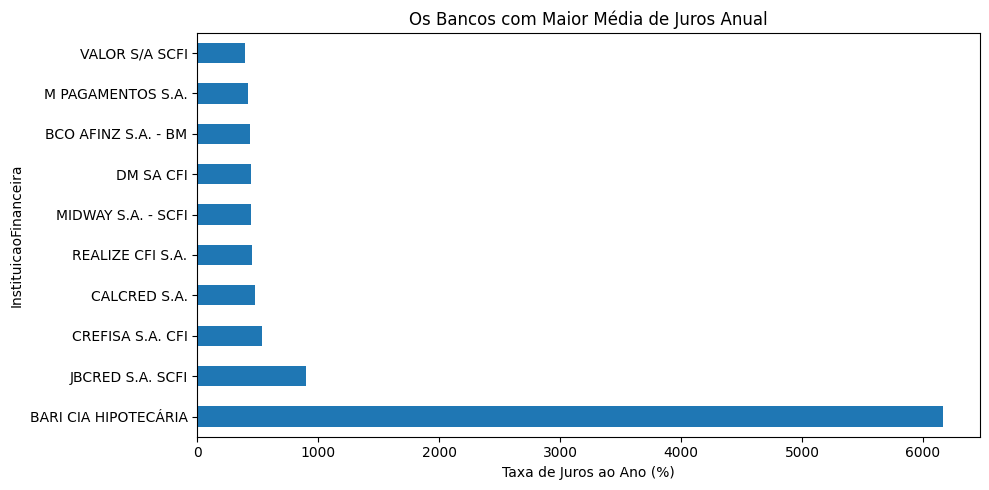

In [16]:
# Agrupa os dados por instituição financeira e calcula a média da taxa de juros ao ano
top_bancos = df.groupby('InstituicaoFinanceira')['TaxaJurosAoAno'] \
    .mean().sort_values(ascending=False).head(10)

# Gera um gráfico de barras horizontais com os 10 bancos que mais cobram juros
top_bancos.plot(kind='barh', figsize=(10, 5),
                title='Os Bancos com Maior Média de Juros Anual')
plt.xlabel('Taxa de Juros ao Ano (%)')
plt.tight_layout()
plt.show()

---
### Quais modalidades de crédito têm as maiores médias de taxa de juros anuais entre pessoas jurídicas.

Média das Taxas Anuais por Modalidade para Pessoa Jurídica:
Modalidade
Cheque especial - Pré-fixado                                                                   218.33
Conta garantida - Pré-fixado                                                                    68.49
Capital de giro com prazo até 365 dias - Pré-fixado                                             45.27
Desconto de cheques - Pré-fixado                                                                37.37
Desconto de duplicatas - Pré-fixado                                                             29.85
Capital de giro com prazo superior a 365 dias - Pré-fixado                                      29.71
Conta garantida - Pós-fixado referenciado em juros flutuantes                                   27.16
Vendor - Pré-fixado                                                                             24.00
Capital de giro com prazo até 365 dias - Pós-fixado referenciado em juros flutuantes            21.12
Capital de 

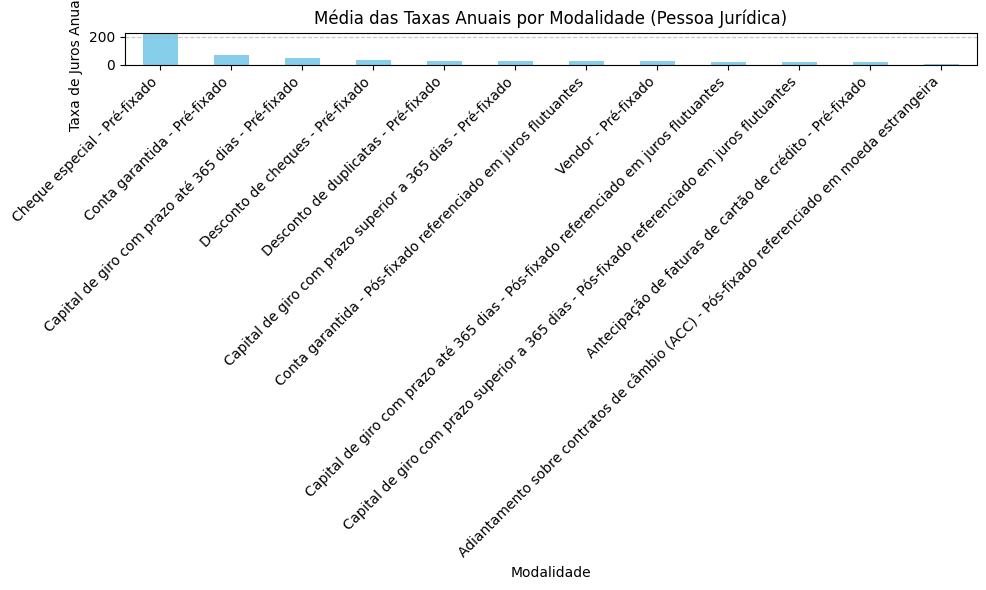

In [17]:
df_pj = df[df["Segmento"] == "Pessoa Jurídica"]

# Calcular a média da taxa anual por modalidade
media_juros_modalidade_pj = df_pj.groupby("Modalidade")["TaxaJurosAoAno"].mean().sort_values(ascending=False).round(2)

print("Média das Taxas Anuais por Modalidade para Pessoa Jurídica:")
print(media_juros_modalidade_pj)

plt.figure(figsize=(10,6))
media_juros_modalidade_pj.plot(kind='bar', color='skyblue')
plt.title("Média das Taxas Anuais por Modalidade (Pessoa Jurídica)")
plt.ylabel("Taxa de Juros Anual (%)")
plt.xlabel("Modalidade")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

---
### Modalidades com juros mais altos e instáveis

In [18]:
# Agrupa por modalidade de crédito e calcula média, desvio padrão e quantidade de registros (Jinja2)
df_grouped = (
    df.groupby('Modalidade')['TaxaJurosAoAno']
    .agg(Media="mean", DesvioPadrao="std", Quantidade="count")
    .sort_values(by='Media', ascending=False)
    .head(10)
)

# Apresenta a tabela formatada com estilo visual
df_grouped.style.set_caption("Modalidades com maiores taxas médias de juros") \
    .format({"Media": "{:.2f}", "DesvioPadrao": "{:.2f}"}) \
    .background_gradient(cmap='Reds')

,Media,DesvioPadrao,Quantidade
Modalidade,,,
Financiamento imobiliário com taxas de mercado - Pós-fixado referenciado em IPCA,716.90,8961.76,235
Cartão de crédito - rotativo total - Pré-fixado,459.12,255.28,50996
Cartão de crédito - parcelado - Pré-fixado,195.92,122.97,50741
Cheque especial - Pré-fixado,170.79,109.53,48890
Crédito pessoal não-consignado - Pré-fixado,148.53,177.66,71388
Conta garantida - Pré-fixado,68.49,71.75,26991
Aquisição de outros bens - Pré-fixado,53.77,40.49,32557
Capital de giro com prazo até 365 dias - Pré-fixado,45.27,46.57,37302
Desconto de cheques - Pré-fixado,39.03,21.68,14194


---
### Evolução da Taxa de Juros ao Longo do Tempo

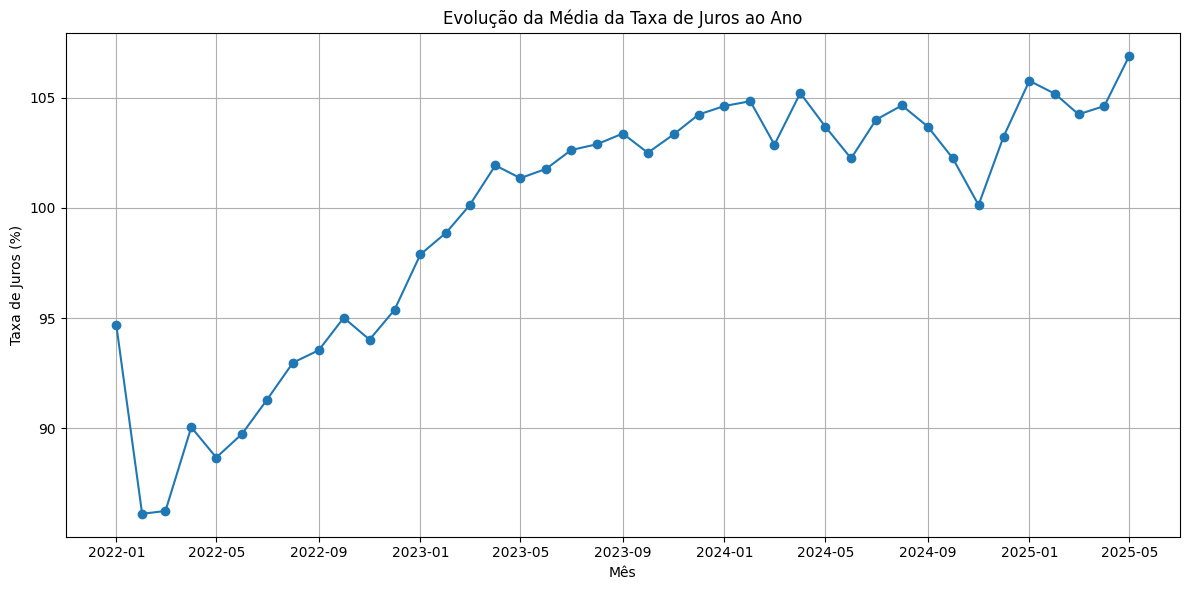

In [19]:
## Cria uma nova coluna 'mes' extraída da data de início do período
df['mes'] = df['InicioPeriodo'].dt.to_period("M")

# Agrupa por mês e calcula a média da taxa de juros ao ano
evolucao = df.groupby('mes')['TaxaJurosAoAno'].mean()
evolucao.index = evolucao.index.to_timestamp()  # converte o índice para datetime

# Gera uma linha temporal mostrando a variação mensal
plt.figure(figsize=(12, 6))
plt.plot(evolucao, marker='o')
plt.title("Evolução da Média da Taxa de Juros ao Ano")
plt.xlabel("Mês")
plt.ylabel("Taxa de Juros (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

---
### Média de taxa de juros PJ e PF

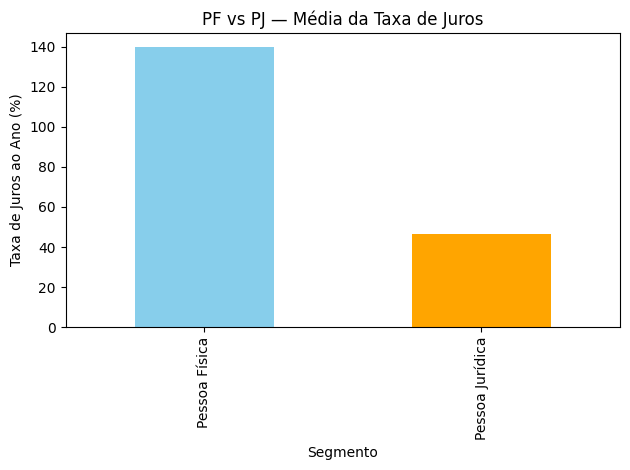

In [20]:
# Agrupa os dados por segmento (ex: Pessoa Física vs Jurídica) e calcula a média da taxa
tipo_pessoa = df.groupby('Segmento')['TaxaJurosAoAno'].mean()

# Gera gráfico de barras comparando as médias por tipo de cliente
tipo_pessoa.plot(kind='bar',
                 color=['skyblue', 'orange'],
                 title="PF vs PJ — Média da Taxa de Juros")
plt.ylabel('Taxa de Juros ao Ano (%)')
plt.tight_layout()
plt.show()


#### Comparamos as taxas médias aplicadas a Pessoa Física e Jurídica, agrupadas por mês. Isso permite observar se há diferenças no comportamento das taxas por tipo de cliente.


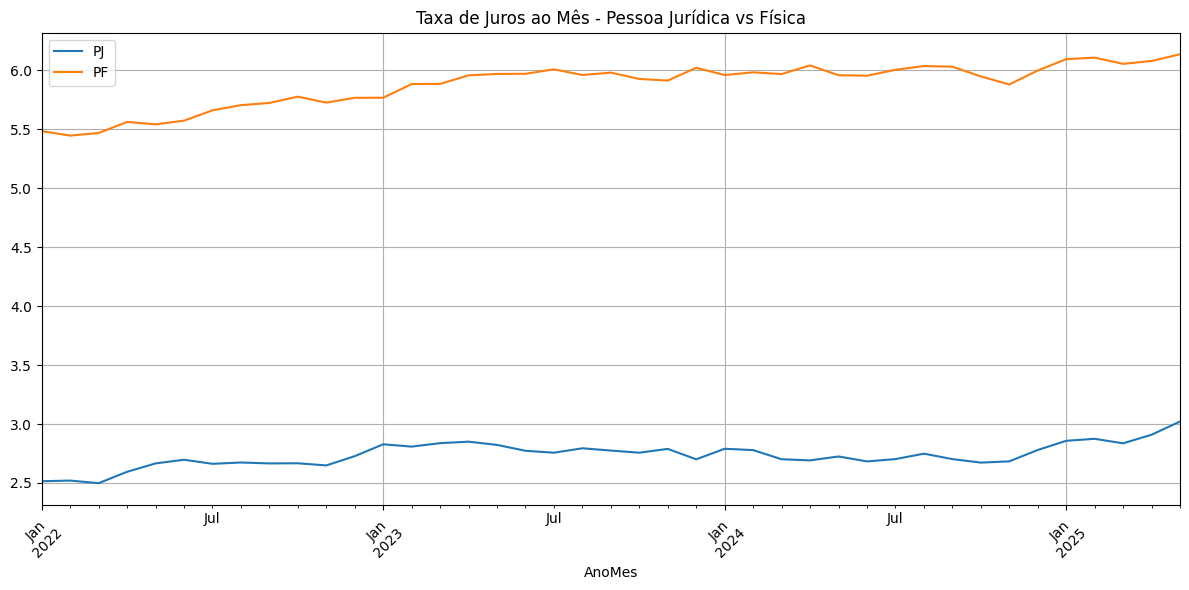

In [21]:
df['Segmento'].unique()  # verificar nomes disponíveis

df_pj = df[df['Segmento'].str.contains("Jurídica", case=False, na=False)]
df_pf = df[df['Segmento'].str.contains("Física", case=False, na=False)]

pj_pf_mes = pd.concat([
    df_pj.groupby('AnoMes')[['TaxaJurosAoMes']].mean().rename(columns={'TaxaJurosAoMes': 'PJ'}),
    df_pf.groupby('AnoMes')[['TaxaJurosAoMes']].mean().rename(columns={'TaxaJurosAoMes': 'PF'})
], axis=1)

pj_pf_mes.plot(figsize=(12,6), title='Taxa de Juros ao Mês - Pessoa Jurídica vs Física')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


---
### Identificamos as 10 modalidades de crédito mais comuns e calculamos a média das taxas ao mês e ao ano para cada uma. Essa análise permite entender quais modalidades têm maiores ou menores juros.


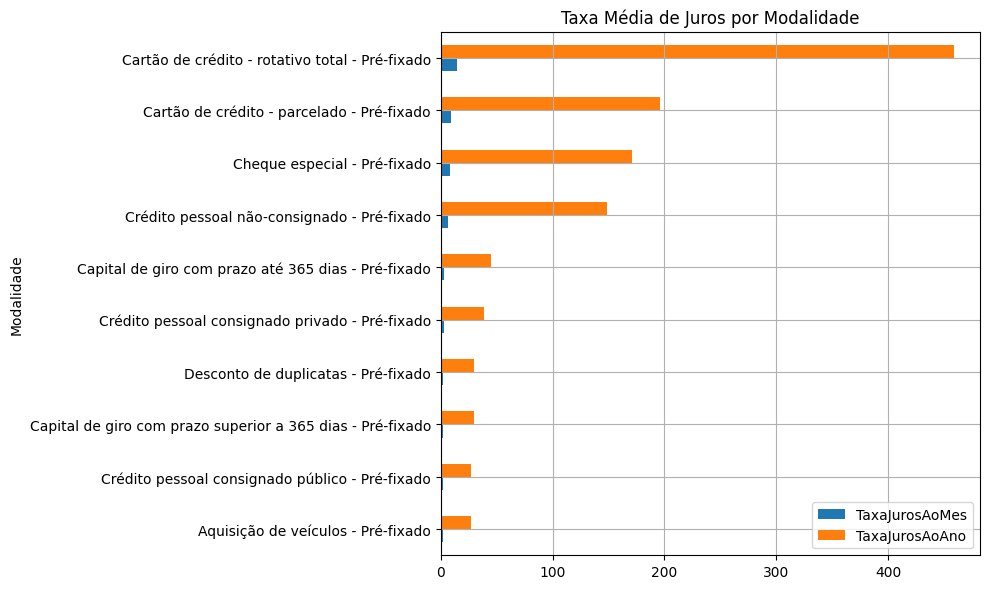

In [22]:
modal_top = df['Modalidade'].value_counts().head(10).index.tolist()
df_mod = df[df['Modalidade'].isin(modal_top)]

modal_juros = df_mod.groupby('Modalidade')[['TaxaJurosAoMes', 'TaxaJurosAoAno']].mean().sort_values(by='TaxaJurosAoAno')

modal_juros.plot(kind='barh', figsize=(10,6), title='Taxa Média de Juros por Modalidade')
plt.grid()
plt.tight_layout()
plt.show()


---
### Selecionamos as 5 instituições mais recorrentes no dataset e comparamos suas médias de taxa de juros ao mês e ao ano.


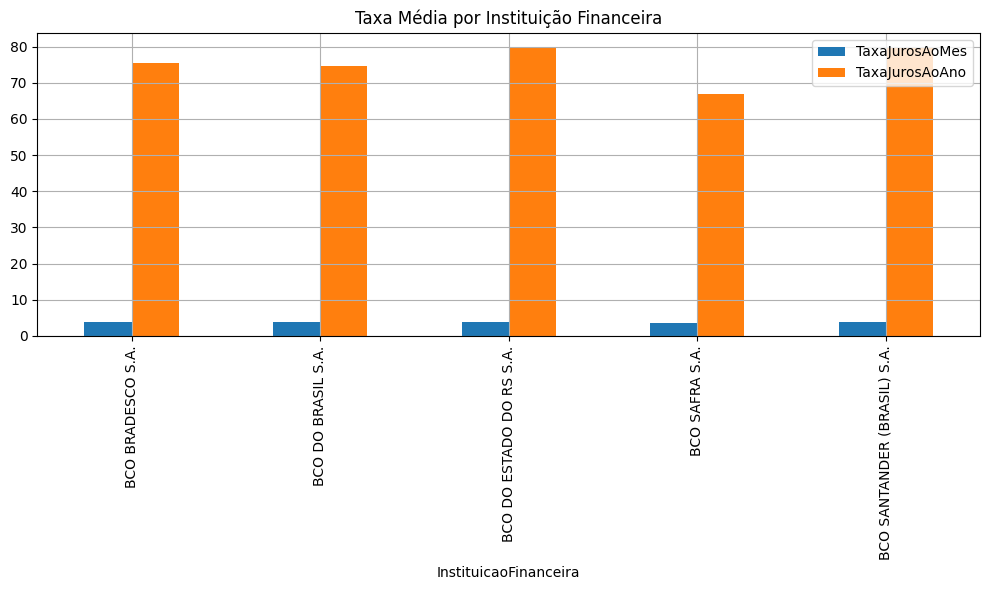

In [23]:
inst_top = df['InstituicaoFinanceira'].value_counts().head(5).index.tolist()
df_inst = df[df['InstituicaoFinanceira'].isin(inst_top)]

inst_juros = df_inst.groupby('InstituicaoFinanceira')[['TaxaJurosAoMes', 'TaxaJurosAoAno']].mean()

inst_juros.plot(kind='bar', figsize=(10,6), title='Taxa Média por Instituição Financeira')
plt.grid()
plt.tight_layout()
plt.show()


---
### As 10 instituições com maiores médias de Taxa de juros ao mês

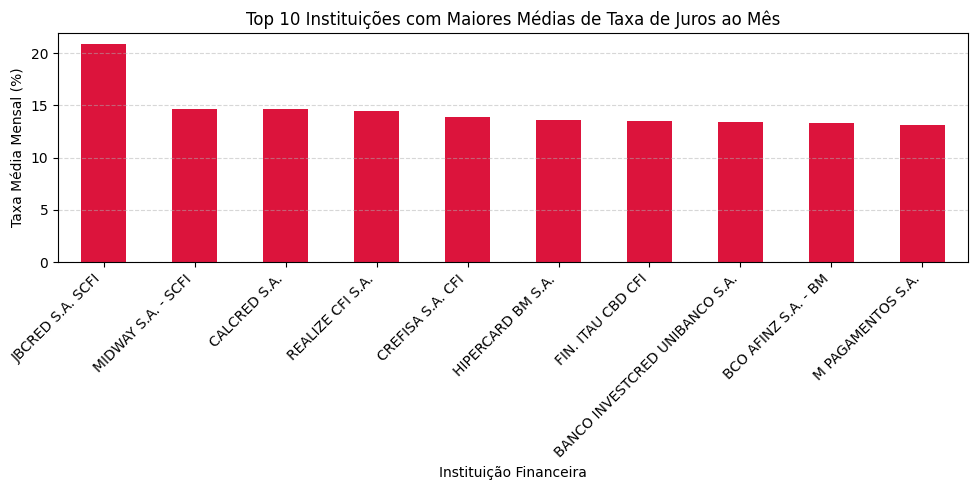

In [24]:
top10_juros_mes = df.groupby("InstituicaoFinanceira")["TaxaJurosAoMes"].mean().sort_values(ascending=False).head(10).round(2)

top10_juros_mes.plot(kind="bar", figsize=(10,5), color="crimson")
plt.title("Top 10 Instituições com Maiores Médias de Taxa de Juros ao Mês")
plt.xlabel("Instituição Financeira")
plt.ylabel("Taxa Média Mensal (%)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

---
# Conclusões

- As taxas de juros variam ao longo do tempo, acompanhando tendências econômicas.
- Pessoas Jurídicas tendem a ter taxas menores do que Pessoas Físicas.
- Modalidades como crédito consignado ou com garantia apresentam menores taxas médias.
- Há variações significativas entre instituições, reforçando a importância da comparação na escolha de crédito.

Todo o tratamento e limpeza dos dados foi necessário para padronizar formatos, remover inconsistências e permitir uma análise confiável.
